# Modeling Wine Dataset with PyTorch

## Table of Contents

[Modeling Wine Dataset with Pytorch](#modeling-wine-dataset-with-pytorch)

- [Preprocessing Wine Dataset for PyTorch](##preprocessing-wine-dataset-for-pytorch)

- [Building Multi-Class Classification Model w/ Pytorch](##building-multi-class-classification-model-w-pytorch)

- [Deep Model Evaluation with PyTorch](##deep-model-evaluation-with-pytorch)

## Preprocessing Wine Dataset for PyTorch

Here focus on preparing Wine dataset for use in machine learning models with PyTorch. Gain thorough understanding how to load datasets, split them, scale features, and convert into PyTorch tensors.

Necessary preprocessing steps:

1. **Loading Data**: We need to load the dataset into our environment to work with it.

2. **Splitting Data**: To evaluate the performance of our model, it's necessary to split the data into training and test sets.

3. **Scaling Features**: Many machine learning algorithms perform better when features are on a similar scale.

4. **Converting to Tensors**: PyTorch models work with tensors, so we need to convert our data into the appropriate format.


**Loading and Exploring Wine Dataset** - The `Wine` dataset is a classic dataset in machine learning, often used for classification tasks. Consists of 178 instances of wine where each instance is described by 13 numeric features (such as alcohol content, malic acid, etc.) . The target variable is class label indicating type of wine (three classes) which will be predicted using the 13 features.

To start preprocessing steps, need load the Wine dataset and explore its structure. Use `sklearn.datasets` to load dataset. Output below will give idea of what dataset looks like and features it contains.

In [1]:
from sklearn.datasets import load_wine
from sklearn import utils as skUtils

wine: skUtils.Bunch = load_wine()

print("Features:", wine.feature_names)
print("Target classes:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']


**Splitting Dataset** - Splitting dataset into training and testing sets is crucial for evaluating performance of machine learning models. Use training set to train model, ensuring it learns patterns within data. The testing set, which model hasn't seen during training, is used to evaluate model's performance. This helps understand how well model generalizes to unseen data.

Using `train_test_split` from `sklearn.model_selection` for this task. Important to use `stratify` for y, ensures class proportions are preserved in both training and testing sets. The `test_size=0.3` parameter means 30% of data used for testing, remaining 70% used for training.

In [2]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (124, 13)
X_test shape: (54, 13)
y_train shape: (124,)
y_test shape: (54,)


Output shows dimensions of training and testing sets. Confirms dataset has been split accordingly, with 124 samples in training set and 54 samples in test set, while keeping feature count constant at 13 for both sets.

**Feature Scaling** - This preprocessing method of feature scaling is critical for many machine learning algorithms. It ensures features are on similar scales, which can improve performance of algorithms. For this will use `StandardScaler` for this from `sklearn.preprocessing` to transform features so they all have mean of 0 and standard deviation of 1.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Unscaled sample:\n", X_train[0])
print("Scaled sample:\n", X_train_scaled[0])

Unscaled sample:
 [1.324e+01 3.980e+00 2.290e+00 1.750e+01 1.030e+02 2.640e+00 2.630e+00
 3.200e-01 1.660e+00 4.360e+00 8.200e-01 3.000e+00 6.800e+02]
Scaled sample:
 [ 0.31150348  1.53123528 -0.2166536  -0.52914688  0.2996897   0.52971226
  0.59215307 -0.33694835  0.1641778  -0.29451975 -0.60101517  0.50616857
 -0.14837546]


While initializing scaler, can use `fit` method to calculate mean and standard deviation for each feature in training set, which are used to transform the features. As shown in output, all features should have similar scales after scaling, making them more suitable for machine learning models.

**Converting Data to PyTorch Tensors** - To use data with PyTorch, need to convert NumPy arrays into PyTorch tensors. Essential conversion as PyTorch models require input data in tensor format.

In [4]:
import torch

In [5]:
X_train_tensor: torch.Tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor: torch.Tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor: torch.Tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor: torch.Tensor = torch.tensor(y_test, dtype=torch.long)

print("Sample of X_train_tensor:", X_train_tensor[0])
print("Sample of y_train_tensor:", y_train_tensor[0])

Sample of X_train_tensor: tensor([ 0.3115,  1.5312, -0.2167, -0.5291,  0.2997,  0.5297,  0.5922, -0.3369,
         0.1642, -0.2945, -0.6010,  0.5062, -0.1484])
Sample of y_train_tensor: tensor(0)


Using `dtype=torch.float32` for features to ensure numeric precision during computations, and `dtype=torch.long` for labels because classification tasks in PyTorch expect labels to be in integer format. Specifically, `torch.long` represents 64-bit integer data type, which is required by loss functions such as `nn.CrossEntropyLoss` in PyTorch. This ensures labels are treated as categorical values and not continuous values, which essential for accurate model training and evaluation.

Output is numerical representation of scaled features of first wine sample in training set and its corresponding class label, where `0` means wine belongs to class 0. Demonstrates how data is transformed into tensor format, ready for use in PyTorch models.

Here seen structure and significance of Wine dataset, loaded and explored features and target classes, split data into training and testing sets using stratified sampling, scaled features to have mean of 0 and standard deviation of 1, and converted scaled data into PyTorch tensors for use in PyTorch models. Mastering these preprocessing steps are basics and essential, solidify understanding and ensure comfortable with foundational skills that translate into better models and more accurate predictions.

## Building Multi-Class Classification Model w/ PyTorch

Now have preprocessed Wine dataset, time to leverage efforts by building multi-class classification model in PyTorch. Will walk through entire process, from loading preprocessed data to defining and training model. Also explore concept of loss functions and optimizers in multi-class context, as always crucial for improving model's performance. Now to build classification model step by step.

**Loading Preprocessed Dataset** - before building multi-class classification model, need to load preprocessed dataset. Good idea to maintain modular code by collecting all the code to preprocess data into a function like `load_preprocessed_data` and store it in a file `data_preprocessing.py`. For now just aggregated into function below.

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.utils as skUtils
import numpy as np
import torch

from typing import Tuple

wine_set: skUtils.Bunch = load_wine()

def load_preprocessed_data(wine: skUtils.Bunch) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    
    X: np.ndarray = wine.data
    y: np.ndarray = wine.target

    X_train: np.ndarray
    X_test: np.ndarray
    y_train: np.ndarray
    y_test: np.ndarray

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

    scaler: StandardScaler = StandardScaler().fit(X_train)
    Xtrain_scaled: np.ndarray = scaler.transform(X_train)
    Xtest_scaled: np.ndarray = scaler.transform(X_test)

    Xtrain_tensor: torch.Tensor = torch.tensor(Xtrain_scaled, dtype=torch.float32)
    Xtest_tensor: torch.Tensor = torch.tensor(Xtest_scaled, dtype=torch.float32)
    ytrain_tensor: torch.Tensor = torch.tensor(y_train, dtype=torch.long)
    ytest_tensor: torch.Tensor = torch.tensor(y_test, dtype=torch.long)

    return (Xtrain_tensor, Xtest_tensor, ytrain_tensor, ytest_tensor)

In [7]:
X_train, X_test, y_train, y_test = load_preprocessed_data(wine_set)

**Building Multi-Class Neural Network with PyTorch** - Dataset is now preprocessed and loaded, ready to build multi-class classification model. A deep machine learning model is composed of layers. Model here is multi-class feed-forward neural network of linear and non-linear layers, where have three linear layers and two ReLU activation layers. Here defined just using `nn.Sequential` . The `nn.Linear` function represents linear transformation and `nn.ReLU` introduces non-linearity to model, which essential for learning complex patterns. Critically without non-linearity, an $N$ number of linear layers only has the same representation power as one linear layer as the weight matrix has same rank $R$ as one layer since all layers can be expressed as linear combination of one layer (so only one linearly independent layer), meaning can all be expressed as one single linear transformation.

Begin input layer of `nn.Linear(13, 10)` which accepts input tensors of size 13 (number of features in dataset) and outputs tensors of size 10. Next, ReLU activation layer applies element-wise non-linear transformation. Process repeated for another layer. Finally output layer `nn.Linear(10, 3)` takes input of size 10 returns output of size 3, corresponding to three wine classes.

Output of model will be tensor of raw scores (logits) for each of three classes. These logits can be converted into probabilities by applying softmax function, which as will see is automatically handled by loss function. Model's output represents model's confidence in each class. Now see model's architecture and displayed.

In [8]:
import torch.nn as nn

model: nn.Sequential = nn.Sequential(
    nn.Linear(in_features=13, out_features=10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


Output describes neural network architecture defined. Showing each layer in sequence, including type (Linear or ReLU), number of input and output features for Linear layers, and whether bias term is included.

**Defining Loss Function** - Have defined model structure, need to specify how measure performance.

The performance measured by loss function, calculates disparity between model's predictions and actual labels. Loss function tells how wrong model is. For classification problem. suitable loss function is Cross-Entropy loss. Is defined in PyTorch as:

In [9]:
criterion: nn.CrossEntropyLoss = nn.CrossEntropyLoss()

$$\ell(x, y) = L = {l_1,\dots,l_N}^\top, \quad l_n = - w_{y_n} \log \frac{\exp(x_{n,y_n})}{\sum_{c=1}^C \exp(x_{n,c})} \cdot \mathbb{1}{y_n \not= \text{ignore\_index}}$$

Cross-Entropy loss used when output needs to be probability distribution. This means helps measure how different predicted probabilities are from actual labels. Because of way `CrossEntropyLoss` works, expects raw scores (also known as logits) as input and internally applies softmax function toc onver these scores into probabilities. So even though softmax typically used for multi-class classification problems, don't need add separate softmax layer in our model; loss function handles it, simplifying model design and ensuring numerical stability.

**Defining Optimizer** - To improve performance of model, need update model parameters (weights and biases). Optimizer comes in here, helps adjust parameters to reduce loss. Optimizer used in this case is Adam. Adam short for Adaptive Moment Estimation, is an algorithm that adjust's model's parameters based on gradients (which tell us how much loss would change if changed parameters). Here set up in PyTorch:

In [10]:
import torch.optim as optim

optimizer: optim.Adam = optim.Adam(model.parameters(), lr=0.001)

The `Adam` optimizer includes settings like learning rate (`lr`) which controls how big step take while updating parameters of model. The `model.parameters()` call returns iterator of all parameters (weights and biases) in model that need to be optimized. These parameters updated during training process to minimize loss. A learning rate of `0.001` generally a good starting point for many problems. Balance ensures steadily move forward to solution without making too large of a step and potentially missing the optimal parameters.

By defining loss function and optimizer, lay groundwork for model to learn and improve through training.

**Training the Model** - After defining model and evaluation metrics, next step to train model using training data.

In [11]:
from typing import Dict, List

num_epochs: int = 150
history: Dict[str, List[float]] = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()

    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    loss.backward()

    optimizer.step()

    history['loss'].append(loss.item())

    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)

        val_loss = criterion(outputs_val, y_test)

        history['val_loss'].append(val_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [1/150], Loss: 1.0919, Validation Loss: 1.0871
Epoch [11/150], Loss: 1.0665, Validation Loss: 1.0624
Epoch [21/150], Loss: 1.0400, Validation Loss: 1.0360
Epoch [31/150], Loss: 1.0092, Validation Loss: 1.0044
Epoch [41/150], Loss: 0.9709, Validation Loss: 0.9658
Epoch [51/150], Loss: 0.9232, Validation Loss: 0.9186
Epoch [61/150], Loss: 0.8666, Validation Loss: 0.8638
Epoch [71/150], Loss: 0.8006, Validation Loss: 0.8014
Epoch [81/150], Loss: 0.7254, Validation Loss: 0.7318
Epoch [91/150], Loss: 0.6422, Validation Loss: 0.6545
Epoch [101/150], Loss: 0.5574, Validation Loss: 0.5727
Epoch [111/150], Loss: 0.4782, Validation Loss: 0.4933
Epoch [121/150], Loss: 0.4083, Validation Loss: 0.4218
Epoch [131/150], Loss: 0.3484, Validation Loss: 0.3610
Epoch [141/150], Loss: 0.2973, Validation Loss: 0.3102


Step by step:

1. **Set Number of Epochs**: Define how many times model will iterate over entire training dataset.

2. **Initialize History**: Create dictionary to store loss and validation loss values for each epoch.

3. **Training Loop**: Loop through the training process for specified number of epochs.

4. **Training Phase**: Switch to training mode, clear gradients, make predictions, calculate loss, perform backpropagation, update parameters, store training loss.

5. **Evaluation Phase**: Switch to evaluation mode, disable gradient calculation, make predictions on validation data (`outputs_val`) which is not used to train model but to evaluate how performs on unseen data, calculate validation loss and store it.

6. **Progress**: Every 10 epochs show training loss and validation loss to monitor progress.

Can see output of complete training process above.

In summary have learned how construct multi-class classification neural network model in PyTorch from defining model structure to training it. Seen how loss function and optimizer work in tandem to reduce model's error, how they defined, and used.

Practice building model and training process on Wine dataset for reinforcement, to build practical experience for approaching real-world machine learning problems using PyTorch confidently. Variations like growing/shrinking learning rate, more/less epochs, changing the hidden layer here, can show impact of different network architectures and optimization strategies. Note arch changes would affect params while lr and epochs are hyperparams. Example try changing learning rate to `0.01` and num_epochs to `200` and hidden layer input to `5` (don't forget to change preceding input layer accordingly), and see how this affects loss descent and final (losses descends faster and finally much lower, because of lr and final because of epochs. val loss may also be lower due to less hidden layer to memorize training set akin to dropout, promoting generalization over mem - try setting that one back while controlling others to verify).

## Deep Model Evaluation with PyTorch

Just trained multi-classification PyTorch model using prepared Wine dataset. Now delve into evaluating model's performance. Goal to discern how well model generalizes from what learned during training to handle unfamilar unseen data. Will dig into loss functions, accuracy computation, performance interpretation, all key components in model evaluation process. Additionally, visualize training and validation losses using `matplotlib` to gain better insights into learning process and model performance.

Before model evaluation recap process of building and training PyTorch model with Wine dataset. Remember code above that:

1. Loading preprocessed data
2. Sets up model defining simple neural network model with 3 layers using `nn.Sequential`
3. Choosing `CrossEntropyLoss` as loss function and `Adam` as optimizer
4. Training model for 150 epochs, recording both training and validation loss

With model trained, now in position to evaluate performance in detailed manner.

**Predicting and Evaluating on Test Set** - During training calculated at each epoch the loss for both training and test set, used as validation, and stored values in `history` dictionary. Helped monitor model's performance and ensure it was not overfitting to training data + see if converging on the optimal one of the local minima.

Now to evaluate fully trained model, again calculate test loss and compute accuracy, which is fraction of correct predictions over total predictions. Will use `torch.no_grad` to disable gradient calculations, as not needed during evaluation, and `accuracy_score` function from `sklearn.metrics` to compute accuracy. Now code for performing these evaluations in PyTorch.

In [12]:
from sklearn.metrics import accuracy_score

model.eval()

with torch.no_grad():
    outputs = model(X_test)

    test_loss = criterion(outputs, y_test).item()

    _, predicted = torch.max(outputs, 1) # Choose class w/ highest val as predicted output

    test_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.9630, Test Loss: 0.2722


In this code, first set model to evaluation mode using `model.eval()` to ensure behaves differently during evaluation compared to training. Next, disable gradient calculation with `torch.no_grad()` to save memory and computational resources. Then pass test data through model to generate outputs. To evaluate model's performance, calculate Cross Entropy Loss using these outputs. 

Also obtain predicted class labels by selecting class with highest value using `torch.max(outputs, 1)` which returns two tensors: the max value (which discard using `_` as not needed) and index of the max value along dimension 1, which corresponds to the predicted class.

Finally, compute test accuracy by comparing predicted labels with true labels using `accuracy_score` function from `sklearn_metrics` . Output values for test accuracy and test loss provide quantitative measures of our model's performance on unseen test data, offering insight into its generalization capacity.

**Visualizing Loss Data with Matplotlib** - Visualizing loss data during model evaluation is crucial as helps in understanding learning progress of model over time. By plotting training and validation loss, we can identify patterns such as overfitting or underfitting, providing valuable insights to fine-tune model. Using `matplotlib` , widely-used plotting library in Python, will graph loss history during training to visually assess model's performance. Here plot loss data.

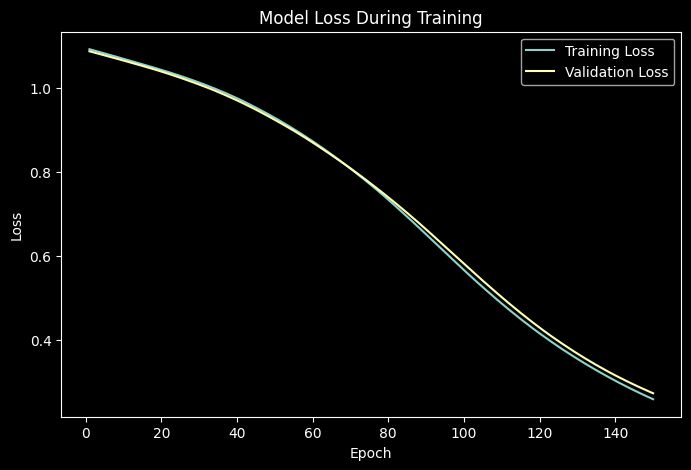

In [21]:
import matplotlib.pyplot as plt

epochs: range = range(1, num_epochs + 1)
train_loss: List[float] = history['loss']
val_loss: List[float] = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()